## Modelowanie ryzyka kredytowego i operacyjnego
## Projekt zaliczeniowy - plik danych nr 8
#### Jakub Zięba
1. Przeprowadzić dość zwięzłą EDA dla posiadanego zestawu danych.
2. Stosując AMA należy wyznaczyć roczny 99,9% OpVaR oraz OpES dla danego banku.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import nbinom
from distfit import distfit
from tqdm import tqdm
warnings.filterwarnings('ignore')

W pierwszej kolejności wczytam odpowiednie dane.

In [4]:
data = pd.read_csv("plik8.csv")
data = data.drop(columns='Unnamed: 0')

Następnie podzielę dane według linii i policzę częstotliwość dla lat. Jest to konieczne, ponieważ dla różnych linii wysokość i częstotliwość strat są skrajnie różne.

In [82]:
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = data['rok'].value_counts()

opcje = ['norm', 't', 'pareto', 'gamma', 'dweibull', 'lognorm', 'uniform']

Kolejnym krokiem będzie policzenie wartości oczekiwanych i wariancji, oraz przedstawienie rozkładów częstości i dotkliwości strat na wykresach.

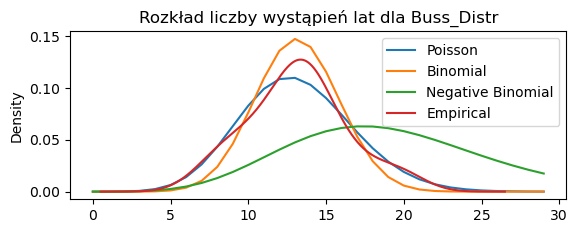

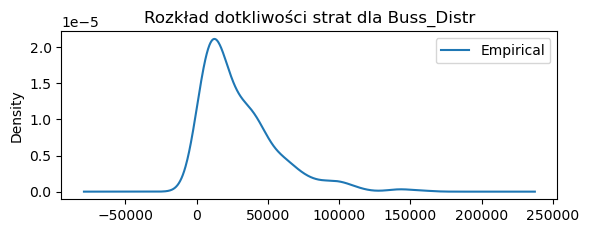

Średnia dla strat Buss_Distr: 30000.00
Odchylenie standardowe strat dla Buss_Distr: 26354.69
Dopasowany rozkład strat dla Buss_Distr: lognorm

Średnia częstość dla Buss_Distr: 13.14
Wariancja częstości dla Buss_Distr: 10.01
Odchylenie standardowe częstości dla Buss_Distr: 3.16


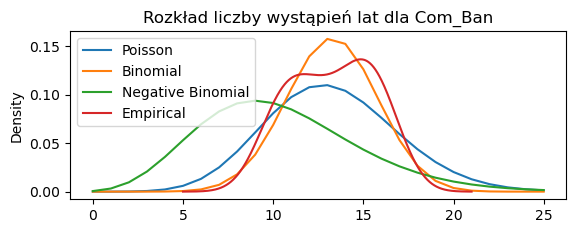

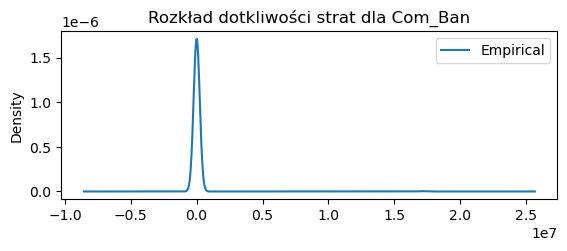

Średnia dla strat Com_Ban: 37009.27
Odchylenie standardowe strat dla Com_Ban: 794206.03
Dopasowany rozkład strat dla Com_Ban: loggamma

Średnia częstość dla Com_Ban: 13.26
Wariancja częstości dla Com_Ban: 5.26
Odchylenie standardowe częstości dla Com_Ban: 2.29


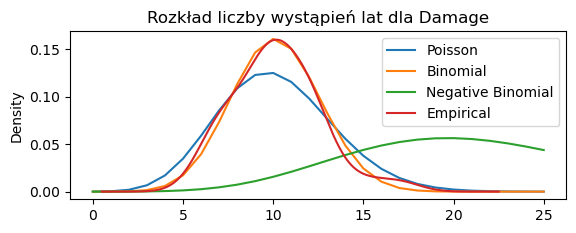

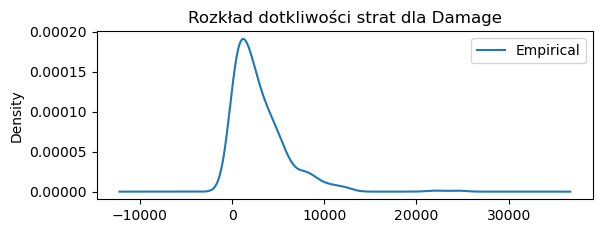

Średnia dla strat Damage: 3000.06
Odchylenie standardowe strat dla Damage: 2995.63
Dopasowany rozkład strat dla Damage: expon

Średnia częstość dla Damage: 10.17
Wariancja częstości dla Damage: 5.68
Odchylenie standardowe częstości dla Damage: 2.38


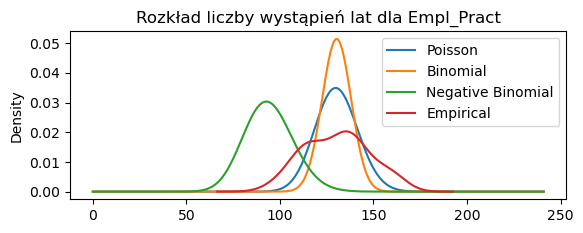

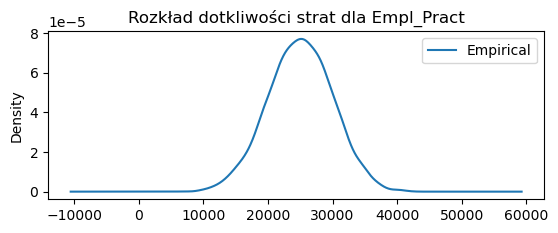

Średnia dla strat Empl_Pract: 25000.00
Odchylenie standardowe strat dla Empl_Pract: 5010.17
Dopasowany rozkład strat dla Empl_Pract: beta

Średnia częstość dla Empl_Pract: 130.29
Wariancja częstości dla Empl_Pract: 283.03
Odchylenie standardowe częstości dla Empl_Pract: 16.82


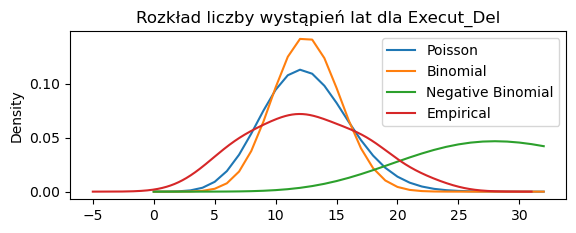

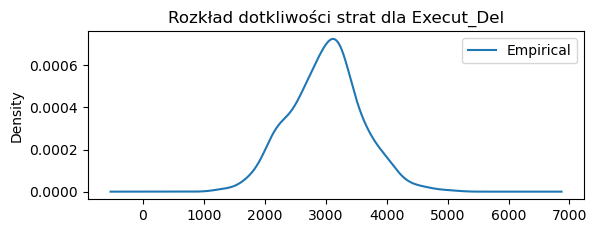

Średnia dla strat Execut_Del: 3000.00
Odchylenie standardowe strat dla Execut_Del: 586.47
Dopasowany rozkład strat dla Execut_Del: loggamma

Średnia częstość dla Execut_Del: 12.57
Wariancja częstości dla Execut_Del: 22.02
Odchylenie standardowe częstości dla Execut_Del: 4.69


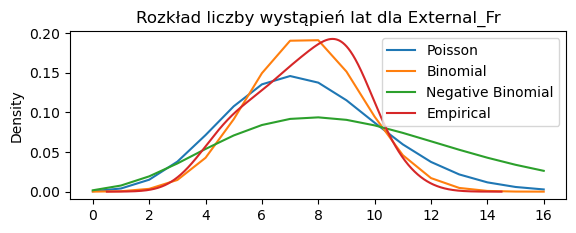

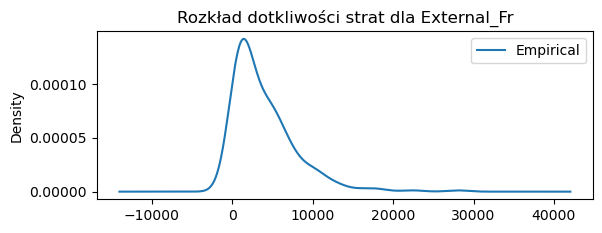

Średnia dla strat External_Fr: 4000.00
Odchylenie standardowe strat dla External_Fr: 3988.49
Dopasowany rozkład strat dla External_Fr: beta

Średnia częstość dla External_Fr: 7.54
Wariancja częstości dla External_Fr: 3.31
Odchylenie standardowe częstości dla External_Fr: 1.82


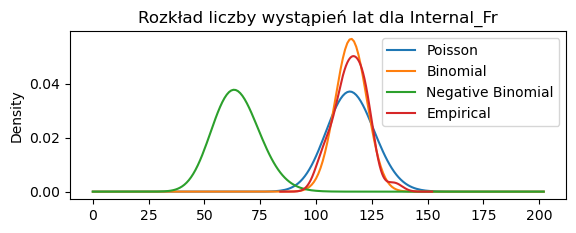

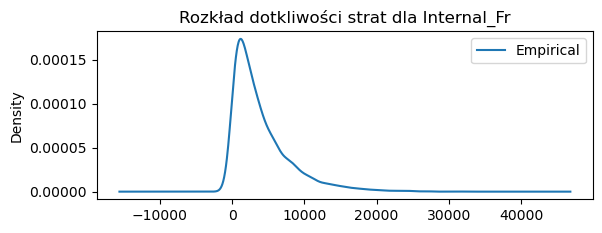

Średnia dla strat Internal_Fr: 4000.01
Odchylenie standardowe strat dla Internal_Fr: 3984.80
Dopasowany rozkład strat dla Internal_Fr: expon

Średnia częstość dla Internal_Fr: 115.63
Wariancja częstości dla Internal_Fr: 52.59
Odchylenie standardowe częstości dla Internal_Fr: 7.25


In [83]:
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = linia_data['rok'].value_counts().sort_index()
    
    plt.subplot(2, 1, 1)
    x = np.arange(0, max(year_counts)*1.5)
    plt.plot(x, poisson.pmf(x, year_counts.mean()), label='Poisson')

    n = max(x)
    p = year_counts.mean() / n
    plt.plot(x, binom.pmf(x, n, p), label='Binomial')
    
    r = year_counts.mean()*(1-p)/p
    plt.plot(x, nbinom.pmf(x, r, p), label='Negative Binomial')
    
    year_counts.plot(kind='kde', title=f'Rozkład liczby wystąpień lat dla {linia}',
                    xlabel='Liczba', ylabel='Frequency', label="Empirical")
    plt.legend()
    plt.show()

    plt.subplot(2, 1, 1)
    linia_data['strata'].plot(kind='kde', title=f'Rozkład dotkliwości strat dla {linia}',
                    xlabel='Liczba', ylabel='Strata', label="Empirical")
    plt.legend()
    plt.show()

    print("Średnia dla strat {}: {:.2f}".format(linia,linia_data['strata'].mean()))
    print("Odchylenie standardowe strat dla {}: {:.2f}".format(linia,linia_data['strata'].std()))
    dfitplot = distfit()
    dfitplot.fit_transform(linia_data['strata'], verbose=False)
    distr = dfitplot.model
    print("Dopasowany rozkład strat dla {}: {}\n".format(linia,distr['name'])) 

    print("Średnia częstość dla {}: {:.2f}".format(linia,year_counts.mean()))
    print("Wariancja częstości dla {}: {:.2f}".format(linia,year_counts.std()**2))
    print("Odchylenie standardowe częstości dla {}: {:.2f}".format(linia,year_counts.std()))

Przyjrzę się kolejnym liniom, zaczynając od Buss_Distr. W tym przypadku rozkład częstości ma grubsze ogony, a jej wartość oczekiwana to ok. 13. Jeśli chodzi o rozkład dotkliwości to ma zdecydowanie grubszy prawy ogon a wartość oczekiwana wynosi 30 tys., przy czym odchylenie standardowe jest niewiele mniejsze i wynosi ok 26 tys.

W przypadku kolejnej linii, Com-Ban, rozkład częstości ma postać rozkładu dwumodalnego, w którym pierwszy wierzchołek odpowiada wartości ok. 13, drugi natomiast jest wyższy i odpowiada wartości 15. Jeśli chodzi o dotkliwość to ma ona bardzo wydłużony prawy ogon (odchylenie standardowe to kosmiczne 794 tys.), średnia natomiast wynosi ok 37 tys

Linia Damage charakteryzuje się w miarę symetrycznym rozkładem częstości, z lekko pogrubionym prawym ogonem i wartością oczekiwaną na poziomie 10. Dotkliwość tego typu wydarzeń posiada wartość oczekiwaną ok. 3 tys. oraz niemal jednakowe odchylenie standardowe.

Rozkład częstości dla linii Empl_Pract jest mocno spłaszczony a jego wartość oczekiwana wynosi 130 przy odchyleniu standardowym o wartości ok. 17. Rozkład dotkliwości w tym przypadku jest mocno symetryczny, z wartością oczekiwaną na poziomie 25 tys. oraz odchyleniu 5 tys.

Podobnie jak w poprzednim przypadku, dla linii Execut_Del rozkład częstości jest spłaszczony, a jego wartość oczekiwana i odchylenie standardowe wynoszą odpowiednio ok. 12 i 5. Empiryczny rozkład strat ma pogrubiony lewy ogon, i wartości wyżej wymienionych statystyk to odpowiednio 3 tys. i ok 600.

Linia External_Fr cechuje się rozkładem liczby wystąpień pochylonym w prawą stronę, z wartością oczekiwaną na poziomie ok 7. Rozkład dotkliwości natomiast ma bardzo gruby i długi prawy ogon. Wartość oczekiwana wynosi 4 tys., podobnie jak odchylenie standardowe.

W przypadku ostatniej linii, Internal_Fr, sytuacja ma się podobnie jak w przypadku linii poprzedniej. Dużo wyższe są natomiast same liczby jeśli chodzi o częstość, ponieważ wartość oczekiwana wynosi ponad 115.


Bazując na powyższej wstępnej analizie oraz na wykresach, postaram się przyporządkować rozkładom częstości odpowiednie rozkłady teoretyczne, wybierając z rozkładów: Poissona, dwumianowego oraz dwumianowego ujemnego. Wspomogę się przy tym poniższym założeniem: 
- 𝐸𝑋 > 𝐷2𝑋 rozkład dwumianowy
- 𝐸𝑋 = 𝐷2𝑋 rozkład Poissona
- 𝐸𝑋 < 𝐷2𝑋 rozkład ujemny dwumianowy

In [84]:
linie = np.unique(data['linia'])
rozklady = ['Poisson', 'Dwumianowy', "Dwumianowy", "Ujemny dw.", "Ujemny dw.", "Dwumianowy", "Dwumianowy"]
przypisanie = pd.DataFrame({'Linia': linie, 'Przypisany rozkład': rozklady})
print(przypisanie)

         Linia Przypisany rozkład
0   Buss_Distr            Poisson
1      Com_Ban         Dwumianowy
2       Damage         Dwumianowy
3   Empl_Pract         Ujemny dw.
4   Execut_Del         Ujemny dw.
5  External_Fr         Dwumianowy
6  Internal_Fr         Dwumianowy


Otrzymuję powyższe przypisanie. Nie jest ono jednak satysfakcjonujące w przypadku linii Empl_Pract oraz Execut_Del. Z tego powodu w dalszych obliczeniach zarówno do dopasowania rozkładów częstości i dotkliwości wykorzystam pakiet distfit.

In [85]:
frequency_table = data.groupby(['linia', 'rok']).size().unstack(fill_value=0)

dist_strata = distfit(distr=['norm', 't', 'pareto', 'gamma', 'dweibull', 'lognorm', 'uniform'])
dist_freq = distfit(distr=['binom','nbinom','poisson','pascal','geom'],method='discrete')
distr_freq = {}
distr_strata = {}

for linia in np.unique(data['linia']):
    data_category = frequency_table.loc[linia]
    dist_freq.fit_transform(data_category, verbose=0)
    distr_freq[linia] = dist_freq.model['model']

    data_category = data[data['linia'] == linia]['strata'].values
    dist_strata.fit_transform(data_category, verbose=0)
    distr_strata[linia] = dist_strata.model['model']

Po dopasowaniu i stworzeniu modeli rozkładów teoretycznych zdefiniuję funkcję, która pozwoli mi obliczyć straty i przy okazji uniknąć poczwórnej pętli w samej symulacji. Polega ona na zasymulowaniu n razy scenariusza, w którym dla każdej linii losuję odpowiednią dla niej liczbę strat, następnie losuję kolejne straty oraz je sumuję. Wynikiem jest n liczb, będacych sumami strat dla wszystkich linii.

In [86]:
def oblicz_straty(n):
    straty = np.zeros(n)
    for i in range(n):
        strata = 0
        for linia in np.unique(data['linia']):
            freq = round(distr_freq[linia].rvs())
            sim_strata = distr_strata[linia].rvs(freq if freq > 0 else 0)
            sim_strata = [0 if strata < 0 else strata for strata in sim_strata] 
            strata += sum(sim_strata)
        straty[i] = strata

    return straty

Wykorzystuję zdefiniowaną wcześniej funkcji do zastosowania procedury kolejne m razy, dzięki czemu jestem w stanie wyznaczyć ostateczny VaR i ES wraz z odchyleniem standardowym wyników.

In [89]:
wynik = pd.DataFrame()
opVar = []
opEs = []
for i in tqdm(range(25)):
    wynik[i] = oblicz_straty(20000)
    opVar.append(np.percentile(wynik[i], 99.9))
    opEs.append(np.mean(wynik[i][wynik[i] > opVar[-1]]))

100%|██████████| 25/25 [1:07:24<00:00, 161.79s/it]


In [90]:
print("OPVaR: \nśrednia: {:.2f}\nodchylenie standardowe: {:.2f}\nmin: {:.2f}\nmax: {:.2f}\n".format(np.mean(opVar),np.std(opVar),np.min(opVar),np.max(opVar)))
print("OPES: \nśrednia: {:.2f}\nodchylenie standardowe: {:.2f}\nmin: {:.2f}\nmax: {:.2f}".format(np.mean(opEs),np.std(opEs),np.min(opEs),np.max(opEs)))

OPVaR: 
średnia: 13006014.09
odchylenie standardowe: 145844.21
min: 12634425.48
max: 13245735.39

OPES: 
średnia: 13811702.08
odchylenie standardowe: 210043.92
min: 13263991.71
max: 14150476.08


Aby móc w jakiś sposób odnieść się do wyników, sprawdzę jaka byłaby strata gdybyśmy obliczali ją jedynie na podstawie wartości oczekiwanych.

In [11]:
sprawdzenie = 0
for linia in np.unique(data['linia']):
    linia_data = data[data['linia'] == linia]
    year_counts = linia_data['rok'].value_counts().sort_index()
    print("Średnia dla strat {}: {:.2f}".format(linia,linia_data['strata'].mean()))
    print("Średnia częstość dla {}: {:.2f}".format(linia,year_counts.mean()))
    print("Wynik z wykorzystaniem samych wartości oczekiwanych: {:.2f}\n".format(year_counts.mean()*linia_data['strata'].mean()))
    sprawdzenie += year_counts.mean()*linia_data['strata'].mean()
print("Suma wyników, średnia strata z wykorzystaniem jedynie wartości oczekiwanych: {:.2f}".format(sprawdzenie))

Średnia dla strat Buss_Distr: 30000.00
Średnia częstość dla Buss_Distr: 13.14
Wynik z wykorzystaniem samych wartości oczekiwanych: 394285.72

Średnia dla strat Com_Ban: 37009.27
Średnia częstość dla Com_Ban: 13.26
Wynik z wykorzystaniem samych wartości oczekiwanych: 490637.13

Średnia dla strat Damage: 3000.06
Średnia częstość dla Damage: 10.17
Wynik z wykorzystaniem samych wartości oczekiwanych: 30514.94

Średnia dla strat Empl_Pract: 25000.00
Średnia częstość dla Empl_Pract: 130.29
Wynik z wykorzystaniem samych wartości oczekiwanych: 3257142.86

Średnia dla strat Execut_Del: 3000.00
Średnia częstość dla Execut_Del: 12.57
Wynik z wykorzystaniem samych wartości oczekiwanych: 37714.28

Średnia dla strat External_Fr: 4000.00
Średnia częstość dla External_Fr: 7.54
Wynik z wykorzystaniem samych wartości oczekiwanych: 30171.43

Średnia dla strat Internal_Fr: 4000.01
Średnia częstość dla Internal_Fr: 115.63
Wynik z wykorzystaniem samych wartości oczekiwanych: 462515.60

Suma wyników, średnia

Wynik taki jest dużo niższy niż wynik symulacji. Jest to jednak moim zdaniem w pełni uzasadnione, biorąc pod uwagę fakt, że większość rozkładów miała pogrubione lub wydłużone prawe ogony. W przypadku niemal wszystkich rozkładów miała miejsce sytuacja, w której odchylenie standardowe było przynajmniej zbliżone do wartości oczekiwanej, a w niektórych przypadkach mocno odstawało (np. jak w przypadku Com_Ban, gdzie odchylenie standardowe stanowiło ponad dwudziestokrotność wartości oczekiwanej). Z tego powodu jestem przekonany, że symulacja została przeprowadzona w dużej mierze poprawnie.